<a href="https://colab.research.google.com/github/babupallam/Supervised-Learning-Classification-Algorithms/blob/main/04_Linear_SVM_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines (SVM)

  - powerful algorithm in ML
  - it can be linear or non linear
  - it can be used for both classication problems and regression problems

### Core Concept:
The fundamental idea behind SVM is to find the optimal boundary (also called a hyperplane) that separates different classes in a dataset. This hyperplane is chosen so that it maximizes the margin between the two classes. The margin is defined as the distance between the hyperplane and the nearest data points from either class, which are called **support vectors**.

### Key Components:
1. **Hyperplane**:
   - In a two-dimensional space, the hyperplane is simply a line that separates the two classes. In higher dimensions, it becomes a flat affine subspace (a plane in 3D, a hyperplane in higher dimensions).

2. **Support Vectors**:
   - These are the data points that are closest to the hyperplane. They are critical because the position of the hyperplane is determined based on these points. The algorithm tries to maximize the distance (margin) between the hyperplane and the support vectors of both classes.

3. **Margin**:
   - The margin is the gap between the hyperplane and the nearest points from either class. SVM aims to maximize this margin, which is why it’s often referred to as a **maximum margin classifier**.

### Linear vs. Non-Linear SVM:
- **Linear SVM**:
  - If the data is linearly separable, meaning it can be separated by a straight line (or flat hyperplane in higher dimensions), a linear SVM is used. The algorithm finds the hyperplane that maximizes the margin between the classes.

- **Non-Linear SVM**:
  - In many cases, the data is not linearly separable. To handle such cases, SVM employs a technique called the **kernel trick**. This involves transforming the data into a higher-dimensional space where it becomes linearly separable. Various kernel functions, like the **Radial Basis Function (RBF)**, **polynomial**, and **sigmoid**, are used to perform this transformation.

### Regularization:
SVM also includes a regularization parameter, \( C \), which controls the trade-off between maximizing the margin and minimizing classification errors. A small value of \( C \) allows more misclassifications (soft margin), making the model more flexible, while a large value of \( C \) aims to classify all training examples correctly but with a risk of overfitting.

### Advantages of SVM:
- **Effective in high-dimensional spaces**: SVM is effective when the number of dimensions exceeds the number of samples.
- **Robust to overfitting**: Particularly when using the regularization parameter.
- **Works well with clear margin of separation**: Especially effective for binary classification problems with a distinct margin.

### Disadvantages of SVM:
- **Computationally expensive**: Particularly for large datasets, since training time scales with the size of the dataset and the dimensionality of the feature space.
- **Not well-suited for very large datasets**: Because of the time complexity.
- **Doesn’t perform well with noisy data**: SVM can struggle when the classes are overlapping or if there are many misclassified examples.




# Demo Code of Linear SVM Classifier (two classes)

In [1]:
#  Import Necessary Libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
# Load and Prepare the Data

# Load the Iris dataset
iris = datasets.load_iris()

# Use only the first two features for visualization purposes
X = iris.data[:, :2]
y = iris.target

# We will only use two classes for a binary classification problem (Setosa vs Versicolor)
X = X[y != 2]
y = y[y != 2]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (SVMs perform better with normalized data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:
# Train the Linear SVM Model

# Create a linear SVM classifier
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model on the training data
svm_linear.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [5]:
#  Evaluate the Model

# Predict the labels on the test set
y_pred = svm_linear.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[17  0]
 [ 0 13]]


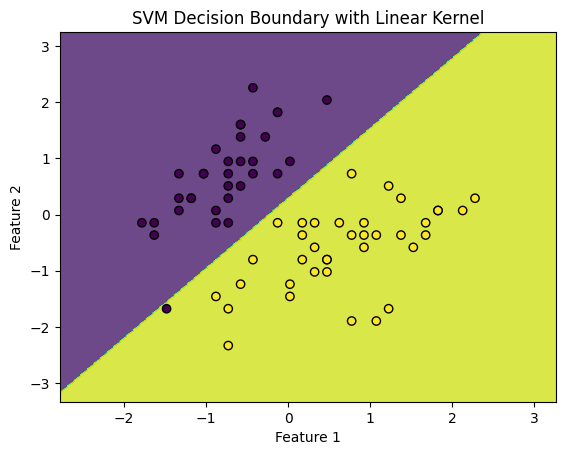

In [6]:
#  Visualize the Decision Boundary
# Function to plot the decision boundary
def plot_decision_boundary(X, y, model):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title('SVM Decision Boundary with Linear Kernel')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot the decision boundary on the training data
plot_decision_boundary(X_train, y_train, svm_linear)



# Demo Code of Linear SVM Classifier (three classes)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


In [16]:
# Load the Iris dataset
iris = datasets.load_iris()

# Use only the first two features for visualization purposes
X = iris.data[:, :2]
y = iris.target

X, y

(array([[5.1, 3.5],
        [4.9, 3. ],
        [4.7, 3.2],
        [4.6, 3.1],
        [5. , 3.6],
        [5.4, 3.9],
        [4.6, 3.4],
        [5. , 3.4],
        [4.4, 2.9],
        [4.9, 3.1],
        [5.4, 3.7],
        [4.8, 3.4],
        [4.8, 3. ],
        [4.3, 3. ],
        [5.8, 4. ],
        [5.7, 4.4],
        [5.4, 3.9],
        [5.1, 3.5],
        [5.7, 3.8],
        [5.1, 3.8],
        [5.4, 3.4],
        [5.1, 3.7],
        [4.6, 3.6],
        [5.1, 3.3],
        [4.8, 3.4],
        [5. , 3. ],
        [5. , 3.4],
        [5.2, 3.5],
        [5.2, 3.4],
        [4.7, 3.2],
        [4.8, 3.1],
        [5.4, 3.4],
        [5.2, 4.1],
        [5.5, 4.2],
        [4.9, 3.1],
        [5. , 3.2],
        [5.5, 3.5],
        [4.9, 3.6],
        [4.4, 3. ],
        [5.1, 3.4],
        [5. , 3.5],
        [4.5, 2.3],
        [4.4, 3.2],
        [5. , 3.5],
        [5.1, 3.8],
        [4.8, 3. ],
        [5.1, 3.8],
        [4.6, 3.2],
        [5.3, 3.7],
        [5. , 3.3],


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (SVMs perform better with normalized data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
# Create a linear SVM classifier
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model on the training data
svm_linear.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [10]:
# Predict the labels on the test set
y_pred = svm_linear.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.54      0.54      0.54        13
   virginica       0.54      0.54      0.54        13

    accuracy                           0.73        45
   macro avg       0.69      0.69      0.69        45
weighted avg       0.73      0.73      0.73        45

[[19  0  0]
 [ 0  7  6]
 [ 0  6  7]]


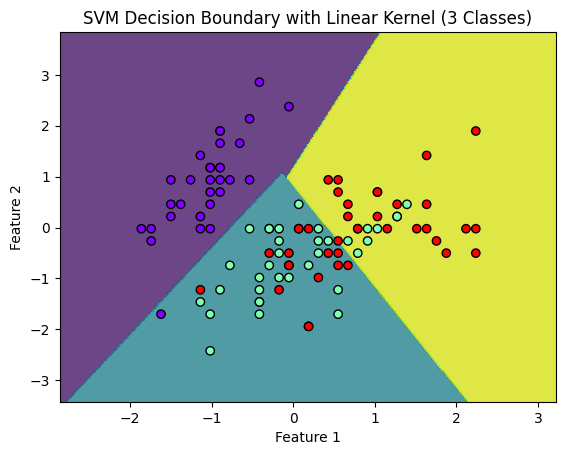

In [11]:
# Function to plot the decision boundary
def plot_decision_boundary(X, y, model):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.rainbow)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title('SVM Decision Boundary with Linear Kernel (3 Classes)')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot the decision boundary on the training data
plot_decision_boundary(X_train, y_train, svm_linear)


# Demo Code of Linear SVM Classifier (three classes with four features in each vector)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA




In [26]:
# Load the Iris dataset
iris = datasets.load_iris()

# Use all four features
X = iris.data
y = iris.target

X, y # X contain 4 features and y contain 3 classes

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [25]:


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (SVMs perform better with normalized data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# Create a linear SVM classifier
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model on the training data
svm_linear.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [19]:
# Predict the labels on the test set
y_pred = svm_linear.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


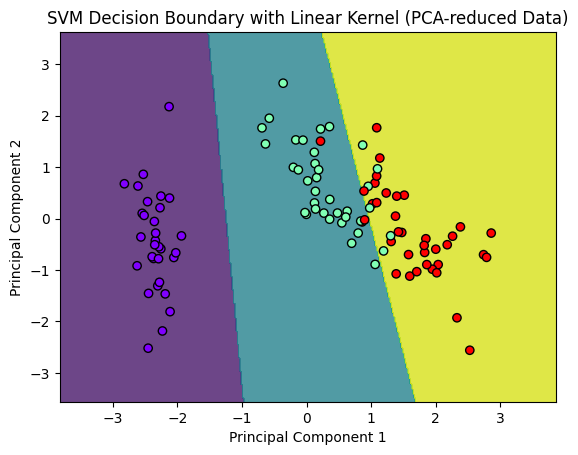

In [22]:
# Reduce dimensionality to 2D using PCA for visualization
# Since we have four features, we'll use PCA to reduce the dimensionality to 2D for visualization purposes.
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train the SVM again on the reduced data
svm_linear_pca = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear_pca.fit(X_train_pca, y_train)

# Function to plot the decision boundary
def plot_decision_boundary(X, y, model):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.rainbow)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title('SVM Decision Boundary with Linear Kernel (PCA-reduced Data)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# Plot the decision boundary on the training data (PCA-reduced)
plot_decision_boundary(X_train_pca, y_train, svm_linear_pca)


# Demo Code of Linear SVM Classifier  (six classes with 10 features in each vector)

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        45
           1       0.75      0.88      0.81        41
           2       0.91      0.73      0.81        56
           3       0.83      0.76      0.80        51
           4       0.79      0.96      0.87        47
           5       0.87      0.80      0.83        60

    accuracy                           0.83       300
   macro avg       0.83      0.84      0.83       300
weighted avg       0.84      0.83      0.83       300

[[41  0  0  0  3  1]
 [ 0 36  0  1  3  1]
 [ 1  5 41  4  2  3]
 [ 4  4  2 39  0  2]
 [ 0  2  0  0 45  0]
 [ 2  1  2  3  4 48]]


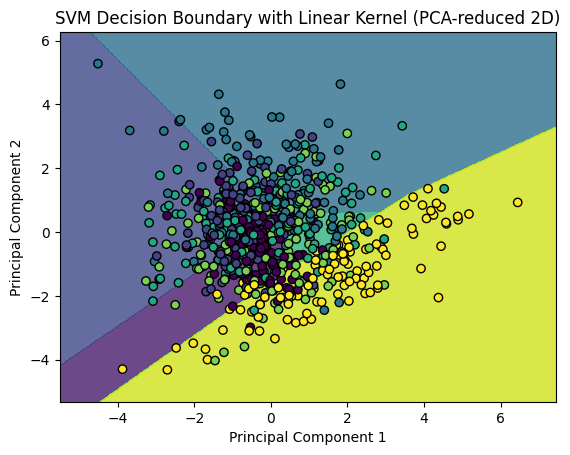

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


# Generate synthetic data with 6 classes and 10 features
X, y = make_classification(n_samples=1000, n_features=10, n_informative=8, n_redundant=2,
                           n_classes=6, n_clusters_per_class=1, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (SVMs perform better with normalized data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Create a linear SVM classifier
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model on the training data
svm_linear.fit(X_train, y_train)



# Predict the labels on the test set
y_pred = svm_linear.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))


from sklearn.decomposition import PCA

# Reduce the dimensionality of the data to 2D for visualization using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train the SVM on the reduced data
svm_linear_pca = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear_pca.fit(X_train_pca, y_train)

# Plot decision boundaries (for the reduced 2D data)
def plot_decision_boundary_2D(X, y, model):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title('SVM Decision Boundary with Linear Kernel (PCA-reduced 2D)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# Plot the decision boundary on the PCA-reduced training data
plot_decision_boundary_2D(X_train_pca, y_train, svm_linear_pca)


# Applications of This Model

### 1. **Botanical Classification**
   - **Plant Species Classification**: Similar to the Iris dataset, SVM models can be used to classify different species of plants based on measurable features such as petal length, petal width, sepal length, and sepal width. This can be extended to classify other botanical features in various plant species, aiding botanists and researchers in identifying plant types from unknown samples.

### 2. **Medical Diagnosis**
   - **Cancer Detection**: SVMs can be used to classify cancerous vs. non-cancerous cells based on features extracted from cell images or other medical data (e.g., gene expression data). For example, in breast cancer diagnosis, features extracted from mammography images can be classified to determine whether a tumor is benign or malignant.
   - **Disease Classification**: Different diseases can be classified based on patient symptoms, genetic information, or diagnostic test results, helping in early diagnosis and personalized treatment plans.

### 3. **Image Classification**
   - **Object Recognition**: The model can be extended to recognize and classify objects in images, especially when distinguishing between multiple classes is necessary. For example, in automated quality control in manufacturing, different product types can be identified based on image features.
   - **Facial Recognition**: Facial recognition systems can use SVMs to classify images into different identities based on facial features. This is commonly used in security systems.

### 4. **Document and Text Classification**
   - **Email Spam Detection**: SVMs can be applied to classify emails as spam or not spam based on features extracted from the text, such as word frequency or the presence of certain keywords.
   - **Sentiment Analysis**: SVMs can classify text data based on sentiment (e.g., positive, negative, neutral), which is valuable for understanding customer feedback, product reviews, or social media posts.
   - **Topic Categorization**: Documents or articles can be classified into different topics (e.g., sports, politics, technology) based on the content, aiding in content filtering and information retrieval.

### 5. **Financial Sector**
   - **Credit Risk Analysis**: SVMs can be used to classify loan applicants into risk categories (e.g., low risk, high risk) based on financial history, income, and other demographic features. This helps in making informed lending decisions.
   - **Fraud Detection**: Transaction data can be classified to detect fraudulent activities by distinguishing between normal and suspicious behavior based on transaction patterns, amounts, and frequency.

### 6. **Speech Recognition**
   - **Voice Command Classification**: In voice-activated systems, SVMs can classify spoken commands into different categories, enabling the system to respond appropriately. This is used in virtual assistants, automated customer service systems, and smart devices.
   - **Language Identification**: SVMs can classify spoken audio into different languages based on acoustic features, which is useful in multilingual systems.

### 7. **Marketing and Customer Segmentation**
   - **Customer Segmentation**: Based on purchasing behavior, demographics, and other features, SVMs can classify customers into different segments, enabling targeted marketing strategies.
   - **Churn Prediction**: SVMs can be used to predict customer churn by classifying customers as likely to stay or leave based on their interaction history, purchase frequency, and customer service interactions.

### 8. **Bioinformatics**
   - **Protein Classification**: SVMs can classify proteins into different functional categories based on sequence or structural features, aiding in the understanding of protein functions and interactions.
   - **Gene Expression Analysis**: SVMs can be applied to classify gene expression profiles into different disease states or conditions, supporting personalized medicine and targeted therapies.

### 9. **Remote Sensing**
   - **Land Use and Land Cover Classification**: Satellite imagery can be classified into different land use categories (e.g., urban, agricultural, forest) based on spectral features. This is important for environmental monitoring, urban planning, and resource management.
   - **Disaster Management**: In disaster management, SVMs can classify areas affected by natural disasters (e.g., floods, fires) based on remote sensing data, helping in damage assessment and resource allocation.

### 10. **Manufacturing and Quality Control**
   - **Defect Detection**: In manufacturing, SVMs can classify products or components as defective or non-defective based on features from visual inspection, X-ray images, or sensor data. This ensures high quality and reduces waste.


# Application 1: Botanical classification using  scikit-learn

SVM to classify plant species based on features like petal length, petal width, sepal length, and sepal width

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA


In [30]:
# Load the Iris dataset
iris = datasets.load_iris()

# Use all four features
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (SVMs perform better with normalized data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [31]:
# Create a linear SVM classifier
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model on the training data
svm_linear.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [32]:
# Predict the labels on the test set
y_pred = svm_linear.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


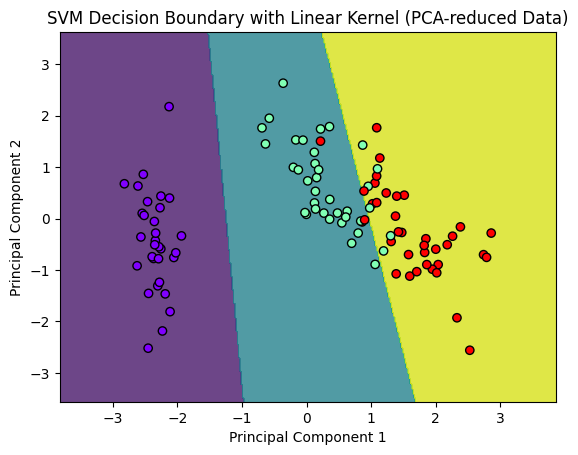

In [33]:
# Reduce dimensionality to 2D using PCA for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train the SVM again on the reduced data
svm_linear_pca = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear_pca.fit(X_train_pca, y_train)

# Function to plot the decision boundary
def plot_decision_boundary(X, y, model):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.rainbow)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title('SVM Decision Boundary with Linear Kernel (PCA-reduced Data)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# Plot the decision boundary on the training data (PCA-reduced)
plot_decision_boundary(X_train_pca, y_train, svm_linear_pca)


# example

In [34]:
# New sample data
new_sample = np.array([[5.1, 3.5, 1.4, 0.2]])

# Standardize the new sample using the same scaler
new_sample_scaled = scaler.transform(new_sample)

# Predict the class using the trained SVM model
predicted_class = svm_linear.predict(new_sample_scaled)
predicted_class_name = iris.target_names[predicted_class[0]]

print(f"The predicted class for the new sample is: {predicted_class_name}")


The predicted class for the new sample is: setosa


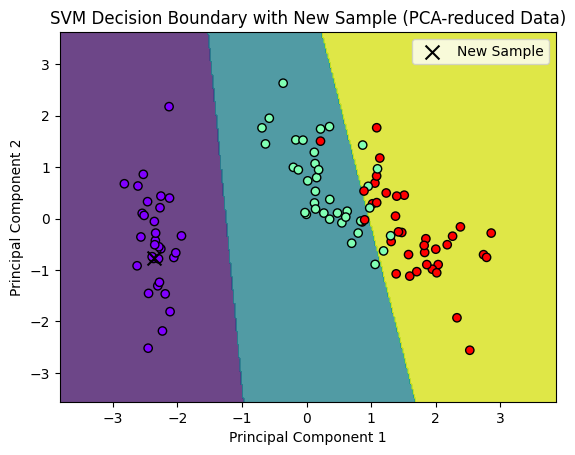

In [35]:
# Project the new sample into the PCA space
new_sample_pca = pca.transform(new_sample_scaled)

# Plot the decision boundary and the new sample
def plot_decision_boundary_with_sample(X, y, model, new_sample):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.rainbow)
    plt.scatter(new_sample[0, 0], new_sample[0, 1], c='black', marker='x', s=100, label='New Sample')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title('SVM Decision Boundary with New Sample (PCA-reduced Data)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

# Plot the decision boundary with the new sample
plot_decision_boundary_with_sample(X_train_pca, y_train, svm_linear_pca, new_sample_pca)


# Application 1: Botanical classification using tensorflow

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix


In [38]:
# Load the Iris dataset
iris = datasets.load_iris()

# Use all four features
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the labels to one-hot encoding for TensorFlow
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)


In [40]:
# Build the model using tensorflow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape=(4,), activation='linear', kernel_regularizer=tf.keras.regularizers.l2(0.01))
])

# Compile the model
model.compile(optimizer='adam', loss='hinge', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 3)                   │              15 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Train the model on the training data
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.7008 - loss: 0.7573 - val_accuracy: 0.6889 - val_loss: 0.8648
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6828 - loss: 0.7665 - val_accuracy: 0.6889 - val_loss: 0.8531
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7007 - loss: 0.7150 - val_accuracy: 0.6889 - val_loss: 0.8416
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6698 - loss: 0.7467 - val_accuracy: 0.7111 - val_loss: 0.8299
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7472 - loss: 0.6635 - val_accuracy: 0.7111 - val_loss: 0.8188
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7339 - loss: 0.7053 - val_accuracy: 0.7333 - val_loss: 0.8074
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6766 - loss: 0.6739 - val_accuracy: 0.7333 - val_loss: 0.7966
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7284 - loss: 0.6617 - val_accuracy: 0.7333 - val_loss: 0.7860


In [43]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Predict the labels on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Print classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true_classes, y_pred_classes))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8250 - loss: 0.4740
Test Accuracy: 0.8000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.83      0.38      0.53        13
           2       0.60      0.92      0.73        13

    accuracy                           0.80        45
   macro avg       0.81      0.77      0.75        45
weighted avg       0.84      0.80      0.78        45

Confusion Matrix:
[[19  0  0]
 [ 0  5  8]
 [ 0  1 12]]


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7869 - loss: 0.5941
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7337 - loss: 0.6242  
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7774 - loss: 0.5999 
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7830 - loss: 0.5621 
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8387 - loss: 0.5405  
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7977 - loss: 0.5758  
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8000 - loss: 0.5706 
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7873 - loss: 0.5914 
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7595 - loss: 0.5920  
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8362 - loss: 0.5320  
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7708 - loss: 0.5413  
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8030 - loss: 0.54

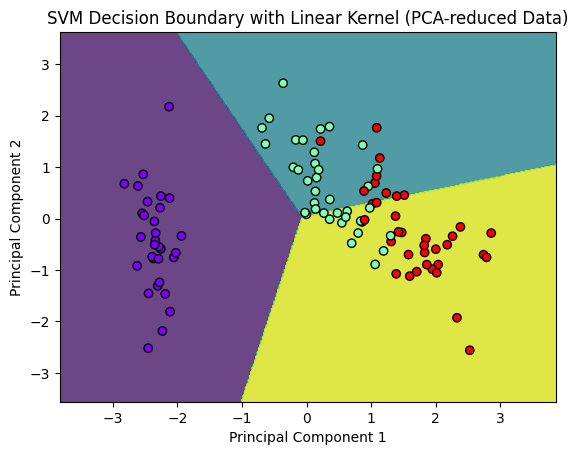

In [44]:
# Reduce dimensionality to 2D using PCA for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train the SVM again on the reduced data
model_pca = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape=(2,), activation='linear', kernel_regularizer=tf.keras.regularizers.l2(0.01))
])

model_pca.compile(optimizer='adam', loss='hinge', metrics=['accuracy'])

# Train the model on the PCA-reduced data
model_pca.fit(X_train_pca, y_train, epochs=50, batch_size=16)

# Function to plot the decision boundary
def plot_decision_boundary(X, y, model):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = np.argmax(model.predict(np.c_[xx.ravel(), yy.ravel()]), axis=1)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=np.argmax(y, axis=1), edgecolors='k', marker='o', cmap=plt.cm.rainbow)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title('SVM Decision Boundary with Linear Kernel (PCA-reduced Data)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# Plot the decision boundary on the training data (PCA-reduced)
plot_decision_boundary(X_train_pca, y_train, model_pca)


testing the prediction

In [50]:
# Select a sample from the test set
sample_index = 3  # You can change this index to test different samples
sample = X_test[sample_index].reshape(1, -1)

# Make a prediction
predicted_class = np.argmax(model.predict(sample), axis=1)
true_class = np.argmax(y_test[sample_index])

# Print the prediction result
print(f"Predicted class: {predicted_class[0]}, True class: {true_class}")
print(f"Class names: {iris.target_names[predicted_class[0]]}, True class name: {iris.target_names[true_class]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted class: 2, True class: 1
Class names: virginica, True class name: versicolor


In [51]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8250 - loss: 0.4740
Test Accuracy: 0.8000


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4332/4332 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


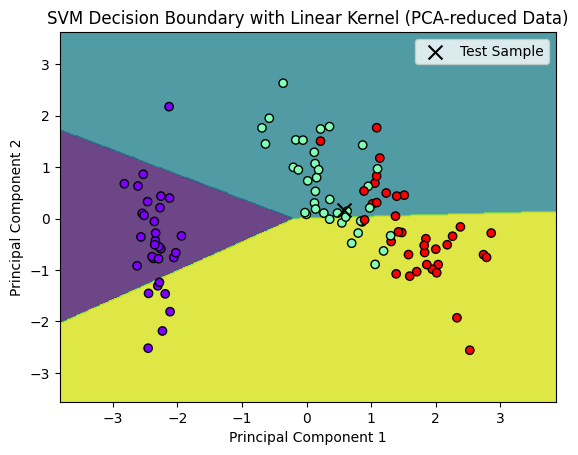

In [52]:
# Reduce dimensionality to 2D using PCA for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
sample_pca = pca.transform(sample)

# Train the SVM again on the reduced data
model_pca = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape=(2,), activation='linear', kernel_regularizer=tf.keras.regularizers.l2(0.01))
])

model_pca.compile(optimizer='adam', loss='hinge', metrics=['accuracy'])

# Train the model on the PCA-reduced data
model_pca.fit(X_train_pca, y_train, epochs=50, batch_size=16, verbose=0)

# Function to plot the decision boundary with a specific sample highlighted
def plot_decision_boundary_with_sample(X, y, model, sample_pca, true_class):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = np.argmax(model.predict(np.c_[xx.ravel(), yy.ravel()]), axis=1)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=np.argmax(y, axis=1), edgecolors='k', marker='o', cmap=plt.cm.rainbow)
    plt.scatter(sample_pca[0, 0], sample_pca[0, 1], c='black', marker='x', s=100, label='Test Sample')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title('SVM Decision Boundary with Linear Kernel (PCA-reduced Data)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

# Plot the decision boundary on the training data (PCA-reduced) with the sample highlighted
plot_decision_boundary_with_sample(X_train_pca, y_train, model_pca, sample_pca, true_class)
